In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_csv('Loan payments data.csv')
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


In [5]:
df.shape


(500, 8)

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female


In [7]:
df['loan_status'].value_counts()


PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: loan_status, dtype: int64

In [9]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status       
female  PAIDOFF               0.688312
        COLLECTION_PAIDOFF    0.181818
        COLLECTION            0.129870
male    PAIDOFF               0.583924
        COLLECTION            0.212766
        COLLECTION_PAIDOFF    0.203310
Name: loan_status, dtype: float64

In [10]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1


In [11]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status       
Bechalor              PAIDOFF               0.611940
                      COLLECTION_PAIDOFF    0.223881
                      COLLECTION            0.164179
High School or Below  PAIDOFF               0.588517
                      COLLECTION            0.234450
                      COLLECTION_PAIDOFF    0.177033
Master or Above       PAIDOFF               0.750000
                      COLLECTION            0.250000
college               PAIDOFF               0.604545
                      COLLECTION_PAIDOFF    0.218182
                      COLLECTION            0.177273
Name: loan_status, dtype: float64

In [12]:
df[['Principal','terms','age','Gender','education']].head()


,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,50,1,Bechalor
2,1000,30,33,1,Bechalor
3,1000,15,27,0,college
4,1000,30,28,1,college


In [14]:
Feature = df[['Principal','terms','age','Gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,50,1,1,0,0
2,1000,30,33,1,1,0,0
3,1000,15,27,0,0,0,1
4,1000,30,28,1,0,0,1


In [15]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,50,1,1,0,0
2,1000,30,33,1,1,0,0
3,1000,15,27,0,0,0,1
4,1000,30,28,1,0,0,1


In [16]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [17]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49337687,  0.89789115,  2.28404253, -0.42665337, -0.39336295,
         1.17997648, -0.88640526],
       [ 0.49337687,  0.89789115,  3.10658738,  2.34382305,  2.54218146,
        -0.84747452, -0.88640526],
       [ 0.49337687,  0.89789115,  0.3099349 ,  2.34382305,  2.54218146,
        -0.84747452, -0.88640526],
       [ 0.49337687, -0.97897162, -0.67711892, -0.42665337, -0.39336295,
        -0.84747452,  1.12815215],
       [ 0.49337687,  0.89789115, -0.51260995,  2.34382305, -0.39336295,
        -0.84747452,  1.12815215]])

# KNN

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 7) (400,)
Test set: (100, 7) (100,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
k = 6

neighK6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighK6
 
yhat = neighK6.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighK6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.615
Test set Accuracy:  0.54


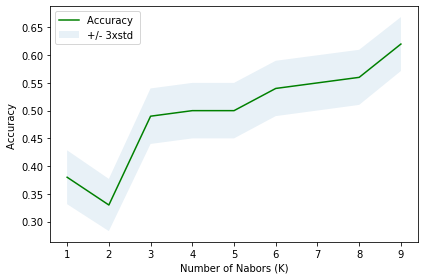

Best accuracy: 0.62 k= 9


In [20]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "Best accuracy:", mean_acc.max(), "k=", mean_acc.argmax()+1)

# Support Vector Machine

In [21]:
df.dtypes
df = df[pd.to_numeric(df['education'], errors='coerce').notnull()]
df['education'] = df['education'].astype('int')
df.dtypes

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [22]:
yhat = clf.predict(X_test)
yhat [0:5]
from sklearn.metrics import classification_report, confusion_matrix
import itertools

                    precision    recall  f1-score   support

        COLLECTION       0.00      0.00      0.00        18
COLLECTION_PAIDOFF       0.00      0.00      0.00        16
           PAIDOFF       0.66      1.00      0.80        66

          accuracy                           0.66       100
         macro avg       0.22      0.33      0.27       100
      weighted avg       0.44      0.66      0.52       100



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

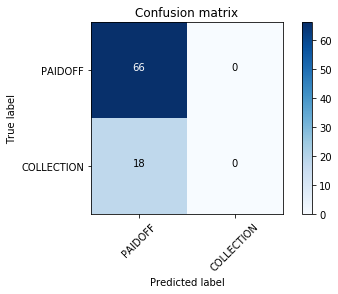

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
#Modelling
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [25]:
Tree.fit(X_trainset,y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [26]:
predTree = Tree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy: ", metrics.accuracy_score(y_testset, predTree))


!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "loan.png"
featureNames = df.columns[0:8]
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Accuracy:  0.6
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hp\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py37h03978a9_1        1001 KB  conda-forge
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        30.3 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  pydotplus          conda-forge/noarch::pydo



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hp\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.8.4      |        py37_1002          27 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          27 KB

The following NEW packages will be INSTALLED:

  python-graphviz    conda-forge/win-64::python-graphviz-0.8.4-py37_1002




python-graphviz-0.8. | 27 KB     |            |   0% 
python-graphviz-0.8. | 27 KB     | #####9     |  60% 
python-graphviz-0.8. | 27 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


ModuleNotFoundError: No module named 'sklearn.externals.six'

# Logistic Regression

In [ ]:
df = df[['loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'age', 'education', 'Gender']]
df['loan_status'] = df['loan_status'].astype('int')

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LogR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LogR

In [ ]:
yhat = LogR.predict(X_test)
yhat
yhat_prob = LogR.predict_proba(X_test)
yhat_prob

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)